In [32]:
import pandas as pd
import numpy as np
import csv 
import matplotlib.pyplot as plt
import seaborn as sns


#https://altair-viz.github.io/gallery/errorbars_with_std.html
#import altair as alt
#from vega_datasets import data

#defining paths
results_milestones = './data/Milestones - timesStandard-prod-Nov24.csv'
dataBinary_milestones = pd.read_csv(results_milestones)
#dataBinary_milestones.drop(dataBinary_milestones[dataBinary_milestones['Participant'] == 'ItaloSantos'].index, inplace = True)


In [33]:
dataBinary_milestones

,PX,Participant,start,group,issue,problem,folder,file,class,method,...,sound solution,alternative answer,Gift card requested,Gift card received,group.1,issue_number,Control YOE,Control Contribs,Alt YOE,Alt Contrib
0,P0,ItaloSantos,2:35 PM,Control,17,17,18.0,18.0,19.0,21.0,...,n,n,y,y,Control,5679,4.0,0.0,NaN,NaN
1,P1,FelipeFelixSantos@gmail.com,10:15 AM,Treatment,2,3,44.0,45.0,45.0,46.0,...,y,n,y,y,Treatment,5485,NaN,NaN,7.0,0.0
2,P2,gk325@nau.edu,3:09:00 PM,Control,1,6,56.0,56.0,58.0,NaN,...,n,n,y,y,Treatment,4612,3.0,0.0,NaN,NaN
3,P3,sb3292@nau.edu,4:21:00 PM,Treatment,3,19,23.0,23.0,23.0,27.0,...,y,n,y,y,Treatment,5194,NaN,NaN,9.0,9.0
4,P4,gummadisk99@gmail.com,1:20 PM,Control,4,14,38.0,38.0,38.0,41.0,...,n,n,y,y,Control,4612,1.0,1.0,NaN,NaN
5,P5,hk486@nau.edu,3:22 PM,Treatment,20,25,31.0,31.0,31.0,32.0,...,y,n,y,y,Treatment,5069,NaN,NaN,4.0,2.0
6,canceled,ap3535@nau.edu,4:17 PM,Control,6,12,27.0,27.0,29.0,40.0,...,y,n,y,y,Control,5485,NaN,NaN,NaN,NaN
7,P6,kv582@nau.edu,12:44 PM,Control,11,19,NaN,NaN,NaN,NaN,...,n,n,y,y,Control,5485,1.0,1.0,NaN,NaN
8,P7,vg588@nau.edu,4:34 PM,Treatment,5,25,35.0,35.0,35.0,37.0,...,y,n,y,y,Treatment,5485,NaN,NaN,2.0,0.0
9,P8,ma3932@nau.edu,4:13 PM,Treatment,7,33,43.0,43.0,43.0,43.0,...,y,n,y,y,Treatment,5485,NaN,NaN,5.0,1.0


In [34]:
#checking if I have to remove the NaN. Removing jk2396 to calculate the 'method' mean 

In [35]:
dataBinary_milestones.columns

Index(['PX', 'Participant', 'start', 'group', 'issue', 'problem', 'folder',
       'file', 'class', 'method', 'line', 'solution', 'implement', 'end',
       'changed issue', 'changed folder', 'changed file', 'changed class',
       'changed method', 'right folder', 'right file', 'right class',
       'right method', 'right lines', 'Correctness Explanation', 'correct',
       'sound solution', 'alternative answer', 'Gift card requested',
       'Gift card received', 'group.1', 'issue_number', 'Control YOE',
       'Control Contribs', 'Alt YOE', 'Alt Contrib'],
      dtype='object')

In [36]:
dataBinary_milestones_valid = dataBinary_milestones[['PX','Participant','start','issue','problem','folder','file','class','method','line','solution','implement','end','group','issue_number']]
dataBinary_milestones_valid_plot = dataBinary_milestones[['PX','Participant','start','issue','problem','folder','file','class','method','line','solution','implement','end','group','issue_number','right folder', 'right file', 'right class',
       'right method', 'right lines', 'Correctness Explanation', 'correct',
       'sound solution']]

Invalid participant (Cheating)

In [37]:
dataBinary_milestones_valid.drop(dataBinary_milestones_valid[dataBinary_milestones_valid['Participant'] == 'ap3535@nau.edu'].index, inplace = True)
dataBinary_milestones_valid_plot.drop(dataBinary_milestones_valid_plot[dataBinary_milestones_valid_plot['Participant'] == 'ap3535@nau.edu'].index, inplace = True)

/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_50138/905850047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataBinary_milestones_valid.drop(dataBinary_milestones_valid[dataBinary_milestones_valid['Participant'] == 'ap3535@nau.edu'].index, inplace = True)
/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_50138/905850047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataBinary_milestones_valid_plot.drop(dataBinary_milestones_valid_plot[dataBinary_milestones_valid_plot['Participant'] == 'ap3535@nau.edu'].index, inplace = True)


Invalid Participants - Pilot/Issues invalidated

In [38]:
#dataBinary_milestones_valid.drop(dataBinary_milestones_valid[dataBinary_milestones_valid['Participant'] == 'ItaloSantos'].index, inplace = True)
#dataBinary_milestones_valid.drop(dataBinary_milestones_valid[dataBinary_milestones_valid['Participant'] == 'Pedro'].index, inplace = True)
#dataBinary_milestones_valid.drop(dataBinary_milestones_valid[dataBinary_milestones_valid['Participant'] == 'klp468@nau.edu'].index, inplace = True)
#dataBinary_milestones_valid.drop(dataBinary_milestones_valid[dataBinary_milestones_valid['Participant'] == 'nk545@nau,edu'].index, inplace = True)
#dataBinary_milestones_valid.drop(dataBinary_milestones_valid[dataBinary_milestones_valid['Participant'] == 'hk486@nau.edu'].index, inplace = True)

#dataBinary_milestones_valid.drop(dataBinary_milestones_valid[dataBinary_milestones_valid['Participant'] == 'jk2396@nau.edu'].index, inplace = True)
#klp468	nk545	5069	hk486	jk2396 Pedro

In [39]:
dataBinary_milestones_valid

,PX,Participant,start,issue,problem,folder,file,class,method,line,solution,implement,end,group,issue_number
0,P0,ItaloSantos,2:35 PM,17,17,18.0,18.0,19.0,21.0,21.0,24.0,43.0,45,Control,5679
1,P1,FelipeFelixSantos@gmail.com,10:15 AM,2,3,44.0,45.0,45.0,46.0,47.0,48.0,50.0,55,Treatment,5485
2,P2,gk325@nau.edu,3:09:00 PM,1,6,56.0,56.0,58.0,NaN,NaN,NaN,NaN,58,Control,4612
3,P3,sb3292@nau.edu,4:21:00 PM,3,19,23.0,23.0,23.0,27.0,27.0,46.0,46.0,46,Treatment,5194
4,P4,gummadisk99@gmail.com,1:20 PM,4,14,38.0,38.0,38.0,41.0,41.0,50.0,56.0,56,Control,4612
5,P5,hk486@nau.edu,3:22 PM,20,25,31.0,31.0,31.0,32.0,33.0,37.0,38.0,38,Treatment,5069
7,P6,kv582@nau.edu,12:44 PM,11,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,Control,5485
8,P7,vg588@nau.edu,4:34 PM,5,25,35.0,35.0,35.0,37.0,37.0,37.0,46.0,46,Treatment,5485
9,P8,ma3932@nau.edu,4:13 PM,7,33,43.0,43.0,43.0,43.0,43.0,43.0,43.0,58,Treatment,5485
10,P9,"nk545@nau,edu",3:14 PM,7,22,25.0,25.0,37.0,46.0,57.0,57.0,NaN,57,Control,5069


In [40]:
# finding mean of the column values with NaN i.e, for Units columns here
# so the Units column has 100, 150 and 80; therefore the mean would ne 110

dataBinary_milestones_valid_mean = dataBinary_milestones_valid.copy()

meanValI = dataBinary_milestones_valid['issue'].mean() 
meanValP = dataBinary_milestones_valid['problem'].mean() 
meanValFo = dataBinary_milestones_valid['folder'].mean() 
meanValFi = dataBinary_milestones_valid['file'].mean() 
meanValC = dataBinary_milestones_valid['class'].mean() 
meanValM = dataBinary_milestones_valid['method'].mean()
meanValL = dataBinary_milestones_valid['line'].mean() 
meanValS = dataBinary_milestones_valid['solution'].mean() 
meanValIm = dataBinary_milestones_valid['implement'].mean()
meanValE = dataBinary_milestones_valid['end'].mean()

# Replace NaNs with the mean of the column where it is located
# the mean calculated above is 110, so NaN values will be replaced with 110
dataBinary_milestones_valid_mean['issue'] = dataBinary_milestones_valid['issue'].fillna(value=meanValI)
dataBinary_milestones_valid_mean['problem'] = dataBinary_milestones_valid['problem'].fillna(value=meanValP)
dataBinary_milestones_valid_mean['folder'] = dataBinary_milestones_valid['folder'].fillna(value=meanValFo)
dataBinary_milestones_valid_mean['file'] = dataBinary_milestones_valid['file'].fillna(value=meanValFi)
dataBinary_milestones_valid_mean['class'] = dataBinary_milestones_valid['class'].fillna(value=meanValC)
dataBinary_milestones_valid_mean['method'] = dataBinary_milestones_valid['method'].fillna(value=meanValM)
dataBinary_milestones_valid_mean['line'] = dataBinary_milestones_valid['line'].fillna(value=meanValL)
dataBinary_milestones_valid_mean['solution'] = dataBinary_milestones_valid['solution'].fillna(value=meanValS)
dataBinary_milestones_valid_mean['implement'] = dataBinary_milestones_valid['implement'].fillna(value=meanValP)
dataBinary_milestones_valid_mean['end'] = dataBinary_milestones_valid['end'].fillna(value=meanValE)

dataBinary_milestones_valid_mean

,PX,Participant,start,issue,problem,folder,file,class,method,line,solution,implement,end,group,issue_number
0,P0,ItaloSantos,2:35 PM,17,17,18.0,18.000000,19.000000,21.0,21.000000,24.0,43.000000,45,Control,5679
1,P1,FelipeFelixSantos@gmail.com,10:15 AM,2,3,44.0,45.000000,45.000000,46.0,47.000000,48.0,50.000000,55,Treatment,5485
2,P2,gk325@nau.edu,3:09:00 PM,1,6,56.0,56.000000,58.000000,35.0,35.368421,42.0,19.653846,58,Control,4612
3,P3,sb3292@nau.edu,4:21:00 PM,3,19,23.0,23.000000,23.000000,27.0,27.000000,46.0,46.000000,46,Treatment,5194
4,P4,gummadisk99@gmail.com,1:20 PM,4,14,38.0,38.000000,38.000000,41.0,41.000000,50.0,56.000000,56,Control,4612
5,P5,hk486@nau.edu,3:22 PM,20,25,31.0,31.000000,31.000000,32.0,33.000000,37.0,38.000000,38,Treatment,5069
7,P6,kv582@nau.edu,12:44 PM,11,19,33.0,34.708333,35.583333,35.0,35.368421,42.0,19.653846,35,Control,5485
8,P7,vg588@nau.edu,4:34 PM,5,25,35.0,35.000000,35.000000,37.0,37.000000,37.0,46.000000,46,Treatment,5485
9,P8,ma3932@nau.edu,4:13 PM,7,33,43.0,43.000000,43.000000,43.0,43.000000,43.0,43.000000,58,Treatment,5485
10,P9,"nk545@nau,edu",3:14 PM,7,22,25.0,25.000000,37.000000,46.0,57.000000,57.0,19.653846,57,Control,5069


In [41]:
# finding mean of the column values with NaN i.e, for Units columns here
# so the Units column has 100, 150 and 80; therefore the mean would ne 110

dataBinary_milestones_valid_60_plot = dataBinary_milestones_valid_plot.copy()

# Replace NaNs with the mean of the column where it is located
# the mean calculated above is 110, so NaN values will be replaced with 110
dataBinary_milestones_valid_60_plot['issue'] = dataBinary_milestones_valid['issue'].fillna(60)
dataBinary_milestones_valid_60_plot['problem'] = dataBinary_milestones_valid['problem'].fillna(60)
dataBinary_milestones_valid_60_plot['folder'] = dataBinary_milestones_valid['folder'].fillna(60)
dataBinary_milestones_valid_60_plot['file'] = dataBinary_milestones_valid['file'].fillna(60)
dataBinary_milestones_valid_60_plot['class'] = dataBinary_milestones_valid['class'].fillna(60)
dataBinary_milestones_valid_60_plot['method'] = dataBinary_milestones_valid['method'].fillna(60)
dataBinary_milestones_valid_60_plot['line'] = dataBinary_milestones_valid['line'].fillna(60)
dataBinary_milestones_valid_60_plot['solution'] = dataBinary_milestones_valid['solution'].fillna(60)
dataBinary_milestones_valid_60_plot['implement'] = dataBinary_milestones_valid['implement'].fillna(60)
dataBinary_milestones_valid_60_plot['end'] = dataBinary_milestones_valid['end'].fillna(60)

dataBinary_milestones_valid_60 = dataBinary_milestones_valid_plot[['Participant','start','issue','problem','folder','file','class','method','line','solution','implement','end','group','issue_number']]

dataBinary_milestones_valid_60

,Participant,start,issue,problem,folder,file,class,method,line,solution,implement,end,group,issue_number
0,ItaloSantos,2:35 PM,17,17,18.0,18.0,19.0,21.0,21.0,24.0,43.0,45,Control,5679
1,FelipeFelixSantos@gmail.com,10:15 AM,2,3,44.0,45.0,45.0,46.0,47.0,48.0,50.0,55,Treatment,5485
2,gk325@nau.edu,3:09:00 PM,1,6,56.0,56.0,58.0,NaN,NaN,NaN,NaN,58,Control,4612
3,sb3292@nau.edu,4:21:00 PM,3,19,23.0,23.0,23.0,27.0,27.0,46.0,46.0,46,Treatment,5194
4,gummadisk99@gmail.com,1:20 PM,4,14,38.0,38.0,38.0,41.0,41.0,50.0,56.0,56,Control,4612
5,hk486@nau.edu,3:22 PM,20,25,31.0,31.0,31.0,32.0,33.0,37.0,38.0,38,Treatment,5069
7,kv582@nau.edu,12:44 PM,11,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,Control,5485
8,vg588@nau.edu,4:34 PM,5,25,35.0,35.0,35.0,37.0,37.0,37.0,46.0,46,Treatment,5485
9,ma3932@nau.edu,4:13 PM,7,33,43.0,43.0,43.0,43.0,43.0,43.0,43.0,58,Treatment,5485
10,"nk545@nau,edu",3:14 PM,7,22,25.0,25.0,37.0,46.0,57.0,57.0,NaN,57,Control,5069


In [140]:
dataBinary_milestones_valid_60_plot.to_csv('./data/dataBinary_milestones_valid_60.csv')

In [43]:
dataBinary_milestones_valid_60 = dataBinary_milestones_valid_60[['issue',	'problem',	'folder',	'file',	'class',	'method',	'line',	'solution',	'implement',	'end', 'group']]
dataBinary_milestones_valid_60.groupby(['group']).mean()

,issue,problem,folder,file,class,method,line,solution,implement,end
group,,,,,,,,,,
Control,9.076923,19.769231,32.181818,32.272727,34.090909,33.300000,34.777778,42.444444,49.285714,49.000000
Treatment,5.692308,19.538462,33.692308,36.769231,36.846154,36.545455,35.900000,41.692308,41.222222,48.230769


In [44]:
dataBinary_milestones_valid_mean[['issue',	'problem',	'folder',	'file',	'class',	'method',	'line',	'solution',	'implement',	'end', 'group']].groupby(['group']).mean()

,issue,problem,folder,file,class,method,line,solution,implement,end
group,,,,,,,,,,
Control,9.076923,19.769231,32.307692,32.647436,34.320513,33.692308,34.959514,42.307692,35.609467,49.000000
Treatment,5.692308,19.538462,33.692308,36.769231,36.846154,36.307692,35.777328,41.692308,34.585799,48.230769


In [45]:
dataBinary_milestones_valid[['issue',	'problem',	'folder',	'file',	'class',	'method',	'line',	'solution',	'implement',	'end', 'group']].groupby(['group']).mean()

,issue,problem,folder,file,class,method,line,solution,implement,end
group,,,,,,,,,,
Control,9.076923,19.769231,32.181818,32.272727,34.090909,33.300000,34.777778,42.444444,49.285714,49.000000
Treatment,5.692308,19.538462,33.692308,36.769231,36.846154,36.545455,35.900000,41.692308,41.222222,48.230769


In [46]:
dataBinary_milestones_valid_jk2396 = dataBinary_milestones_valid.drop(dataBinary_milestones_valid[dataBinary_milestones_valid['Participant'] == 'jk2396@nau.edu'].index)


In [47]:
dataBinary_milestones_valid_jk2396

,PX,Participant,start,issue,problem,folder,file,class,method,line,solution,implement,end,group,issue_number
0,P0,ItaloSantos,2:35 PM,17,17,18.0,18.0,19.0,21.0,21.0,24.0,43.0,45,Control,5679
1,P1,FelipeFelixSantos@gmail.com,10:15 AM,2,3,44.0,45.0,45.0,46.0,47.0,48.0,50.0,55,Treatment,5485
2,P2,gk325@nau.edu,3:09:00 PM,1,6,56.0,56.0,58.0,NaN,NaN,NaN,NaN,58,Control,4612
3,P3,sb3292@nau.edu,4:21:00 PM,3,19,23.0,23.0,23.0,27.0,27.0,46.0,46.0,46,Treatment,5194
4,P4,gummadisk99@gmail.com,1:20 PM,4,14,38.0,38.0,38.0,41.0,41.0,50.0,56.0,56,Control,4612
5,P5,hk486@nau.edu,3:22 PM,20,25,31.0,31.0,31.0,32.0,33.0,37.0,38.0,38,Treatment,5069
7,P6,kv582@nau.edu,12:44 PM,11,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,Control,5485
8,P7,vg588@nau.edu,4:34 PM,5,25,35.0,35.0,35.0,37.0,37.0,37.0,46.0,46,Treatment,5485
9,P8,ma3932@nau.edu,4:13 PM,7,33,43.0,43.0,43.0,43.0,43.0,43.0,43.0,58,Treatment,5485
10,P9,"nk545@nau,edu",3:14 PM,7,22,25.0,25.0,37.0,46.0,57.0,57.0,NaN,57,Control,5069


In [48]:
#dataBinary_milestones_valid_jk2396 = dataBinary_milestones_valid_jk2396['method']

In [49]:
dataBinary_milestones_valid_jk2396[['method','group']].groupby(['group']).mean()

,method
group,
Control,33.300000
Treatment,36.545455


In [50]:
dataBinary_milestones_valid_T = dataBinary_milestones_valid[dataBinary_milestones_valid.group == 'Treatment']

In [51]:
dataBinary_milestones_valid_C = dataBinary_milestones_valid[dataBinary_milestones_valid.group == 'Control']

In [52]:
#dataBinary_milestones_valid_T[['issue','problem','folder','file','class','method','line','solution','implement','end']].plot(kind='line',  ms=10)

#plt.show()

In [53]:
#dataBinary_milestones_valid_C[['issue','problem','folder','file','class','method','line','solution','implement','end']].plot(kind='line',  ms=10)

#plt.show()

In [54]:
means = dataBinary_milestones_valid[['issue',	'problem',	'folder',	'file',	'class',	'method',	'line',	'solution',	'implement',	'end', 'group']].groupby(['group']).mean()
means

,issue,problem,folder,file,class,method,line,solution,implement,end
group,,,,,,,,,,
Control,9.076923,19.769231,32.181818,32.272727,34.090909,33.300000,34.777778,42.444444,49.285714,49.000000
Treatment,5.692308,19.538462,33.692308,36.769231,36.846154,36.545455,35.900000,41.692308,41.222222,48.230769


In [55]:
ypoints_C = means.iloc[0:1,0:9]
ypoints_C

,issue,problem,folder,file,class,method,line,solution,implement
group,,,,,,,,,
Control,9.076923,19.769231,32.181818,32.272727,34.090909,33.3,34.777778,42.444444,49.285714


In [56]:
ypoints_C.to_csv('ypoints_C.csv',index=False)

In [57]:
ypoints_C2 = pd.read_csv('ypoints_C.csv')
ypoints_C2

,issue,problem,folder,file,class,method,line,solution,implement
0,9.076923,19.769231,32.181818,32.272727,34.090909,33.3,34.777778,42.444444,49.285714


In [58]:
ypoints_T = means.iloc[1:2,0:9]
ypoints_T

,issue,problem,folder,file,class,method,line,solution,implement
group,,,,,,,,,
Treatment,5.692308,19.538462,33.692308,36.769231,36.846154,36.545455,35.9,41.692308,41.222222


In [60]:
ypoints_T.to_csv('./data/ypoints_T.csv',index=False)

In [61]:
ypoints_T2 = pd.read_csv('./data/ypoints_T.csv')
ypoints_T2

,issue,problem,folder,file,class,method,line,solution,implement
0,5.692308,19.538462,33.692308,36.769231,36.846154,36.545455,35.9,41.692308,41.222222


In [62]:
ypoints_T2.dtypes

issue        float64
problem      float64
folder       float64
file         float64
class        float64
method       float64
line         float64
solution     float64
implement    float64
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

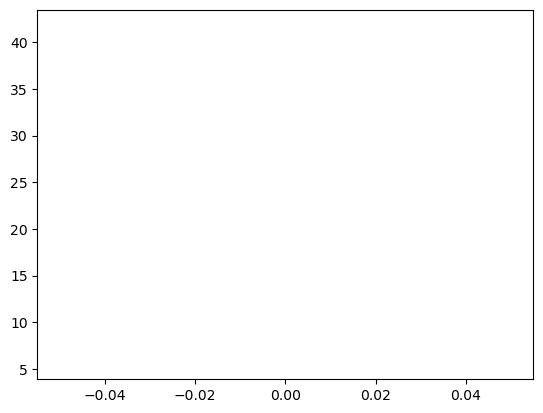

In [63]:

plt.plot(ypoints_T2, color='r')
plt.show

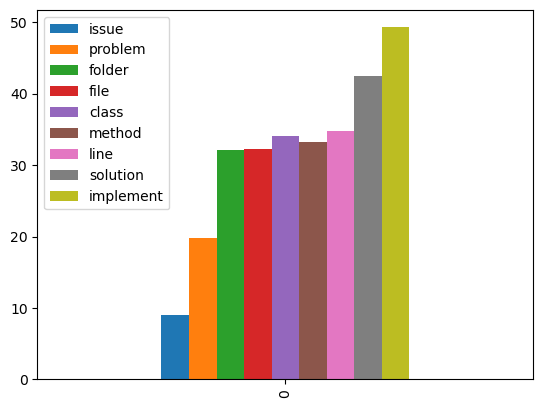

In [64]:
ypoints_C2[['issue','problem','folder','file','class','method','line','solution','implement']].plot(kind='bar')

plt.show()

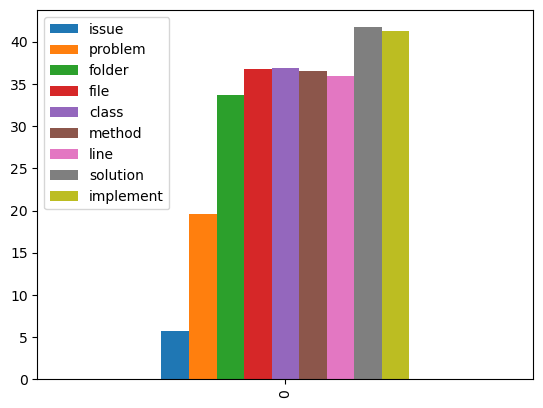

In [65]:
ypoints_T2[['issue','problem','folder','file','class','method','line','solution','implement']].plot(kind='bar')

plt.show()

In [66]:
#dataBinary_milestones_valid[['issue',	'problem',	'folder',	'file',	'class',	'method',	'line',	'solution',	'implement',	'end', 'group', 'issue_number']].groupby(['issue_number']).mean()

In [67]:
dataBinary_milestones_valid[['issue',	'problem',	'folder',	'file',	'class',	'method',	'line',	'solution',	'implement',	'end', 'group', 'issue_number']].groupby(['group','issue_number']).mean()

issue  problem     folder       file      class  \
group     issue_number                                                        
Control   4612           9.000000     14.0  41.666667  41.666667  42.333333   
          5069           6.500000     33.0  42.000000  42.500000  48.500000   
          5194          13.000000     51.0        NaN        NaN        NaN   
          5485           8.600000     14.2  27.750000  28.000000  28.250000   
          5679          11.000000     13.5  17.000000  16.500000  19.000000   
Treatment 4612           4.000000      8.0  31.000000  60.000000  60.000000   
          5069          11.000000     25.0  41.000000  42.000000  42.333333   
          5194           2.333333     20.0  28.000000  30.333333  30.333333   
          5485           5.400000     16.8  31.000000  31.200000  31.200000   
          5679           3.000000     27.0  45.000000  45.000000  45.000000   

                           method  line   solution  implement        end  
group     issue_number                                                    
Control   4612          36.000000  41.0  50.000000       56.0  55.000000  
          5069          53.000000  58.5  58.500000       60.0  58.500000  
          5194                NaN   NaN        NaN        NaN  57.000000  
          5485          28.500000  28.5  40.750000       46.5  44.600000  
          5679          20.500000  20.5  26.000000       43.0  37.500000  
Treatment 4612          60.000000  60.0  60.000000       60.0  60.000000  
          5069          32.000000  33.0  45.000000       38.0  51.333333  
          5194          33.666667  27.0  40.333333       38.0  45.333333  
          5485          31.800000  32.0  33.400000       39.4  43.400000  
          5679          50.000000  52.0  59.000000        NaN  60.000000

In [68]:
dataBinary_milestones_valid_T[['issue',	'problem',	'folder',	'file',	'class',	'method',	'line',	'solution',	'implement',	'end', 'issue_number']].groupby(['issue_number']).mean()

,issue,problem,folder,file,class,method,line,solution,implement,end
issue_number,,,,,,,,,,
4612,4.000000,8.0,31.0,60.000000,60.000000,60.000000,60.0,60.000000,60.0,60.000000
5069,11.000000,25.0,41.0,42.000000,42.333333,32.000000,33.0,45.000000,38.0,51.333333
5194,2.333333,20.0,28.0,30.333333,30.333333,33.666667,27.0,40.333333,38.0,45.333333
5485,5.400000,16.8,31.0,31.200000,31.200000,31.800000,32.0,33.400000,39.4,43.400000
5679,3.000000,27.0,45.0,45.000000,45.000000,50.000000,52.0,59.000000,NaN,60.000000


In [69]:
dataBinary_milestones_valid_C[['issue',	'problem',	'folder',	'file',	'class',	'method',	'line',	'solution',	'implement',	'end', 'issue_number']].groupby(['issue_number']).mean()

,issue,problem,folder,file,class,method,line,solution,implement,end
issue_number,,,,,,,,,,
4612,9.0,14.0,41.666667,41.666667,42.333333,36.0,41.0,50.00,56.0,55.0
5069,6.5,33.0,42.000000,42.500000,48.500000,53.0,58.5,58.50,60.0,58.5
5194,13.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0
5485,8.6,14.2,27.750000,28.000000,28.250000,28.5,28.5,40.75,46.5,44.6
5679,11.0,13.5,17.000000,16.500000,19.000000,20.5,20.5,26.00,43.0,37.5


In [70]:
T_mean = dataBinary_milestones_valid_T[['issue',	'problem',	'folder',	'file',	'class',	'method',	'line',	'solution',	'implement',	'end', 'issue_number']].groupby(['issue_number']).mean()

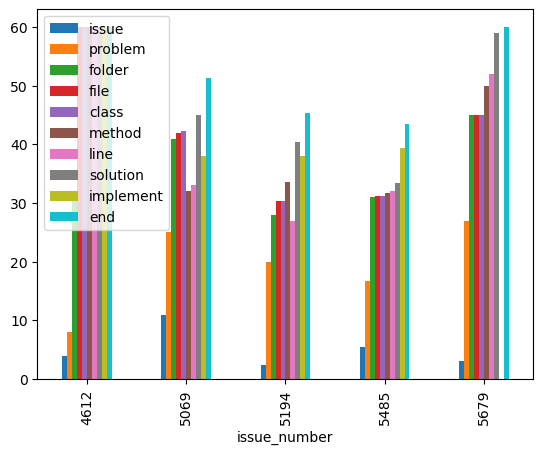

In [71]:
T_mean[['issue','problem','folder','file','class','method','line','solution','implement','end']].plot(kind='bar')

plt.show()

In [72]:
C_mean = dataBinary_milestones_valid_C[['issue',	'problem',	'folder',	'file',	'class',	'method',	'line',	'solution',	'implement',	'end', 'issue_number']].groupby(['issue_number']).mean()

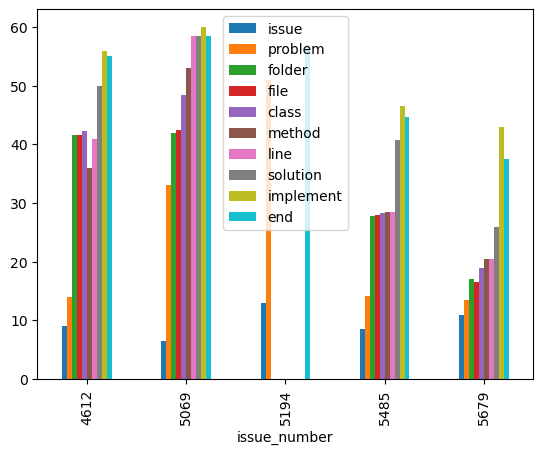

In [73]:
C_mean[['issue','problem','folder','file','class','method','line','solution','implement','end']].plot(kind='bar')

plt.show()

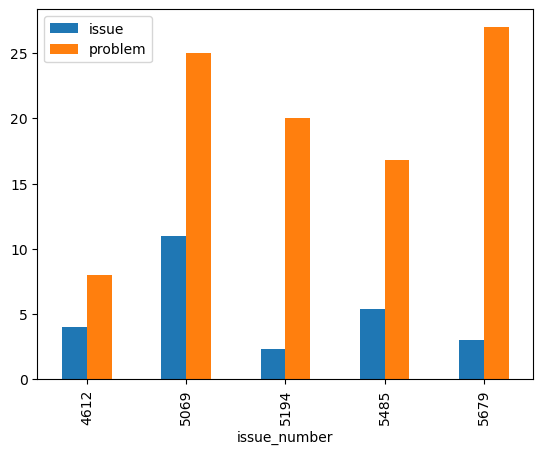

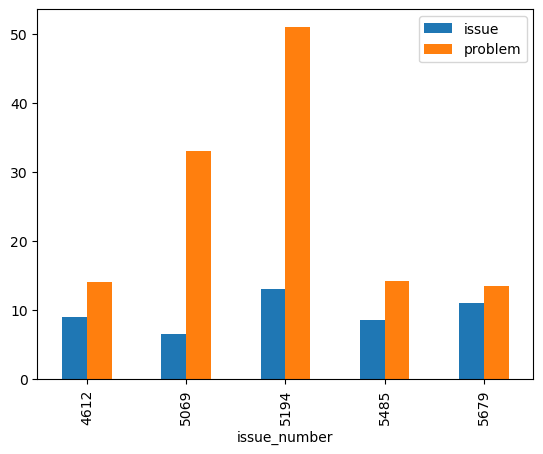

In [74]:
T_mean[['issue','problem']].plot(kind='bar')
C_mean[['issue','problem']].plot(kind='bar')

plt.show()

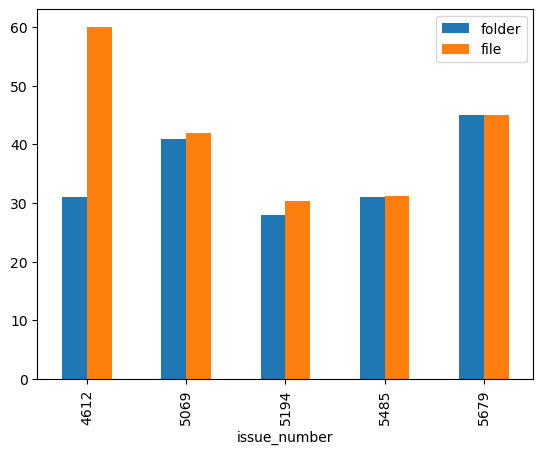

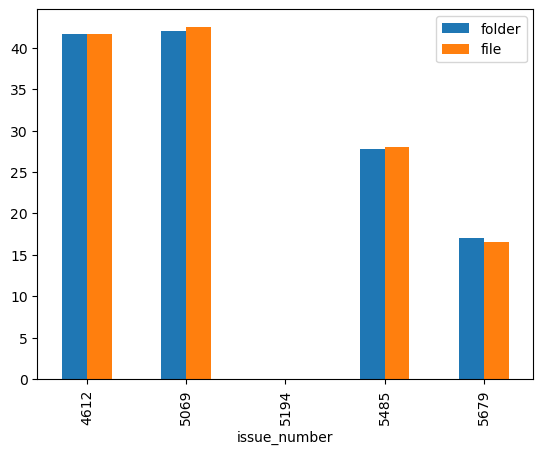

In [75]:
T_mean[['folder','file']].plot(kind='bar')
C_mean[['folder','file']].plot(kind='bar')

plt.show()

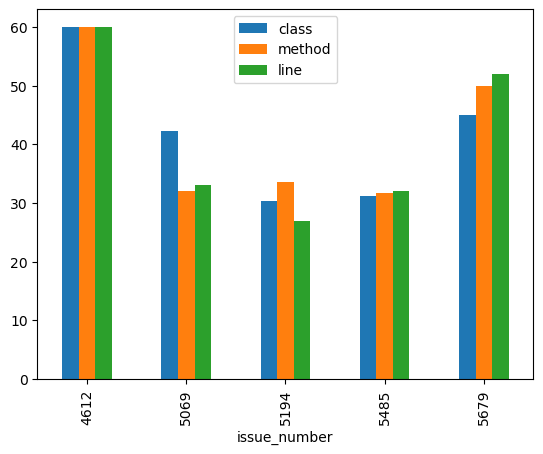

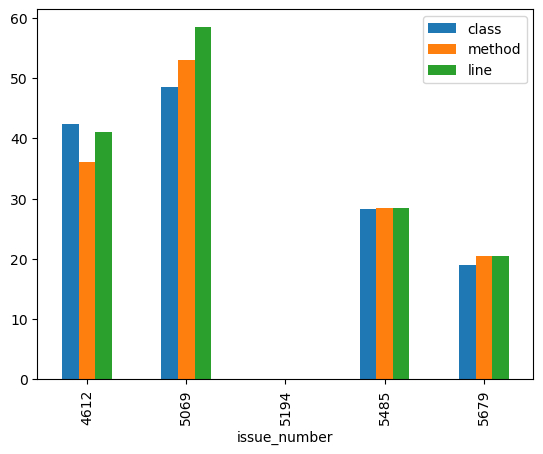

In [76]:
T_mean[['class','method', 'line']].plot(kind='bar')
C_mean[['class','method', 'line']].plot(kind='bar')

plt.show()

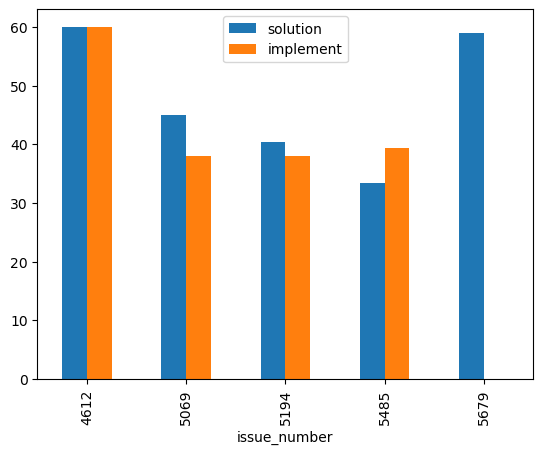

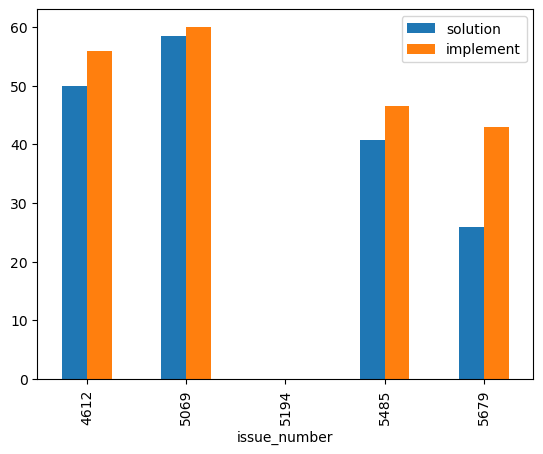

In [77]:
T_mean[['solution','implement']].plot(kind='bar')
C_mean[['solution','implement']].plot(kind='bar')

plt.show()

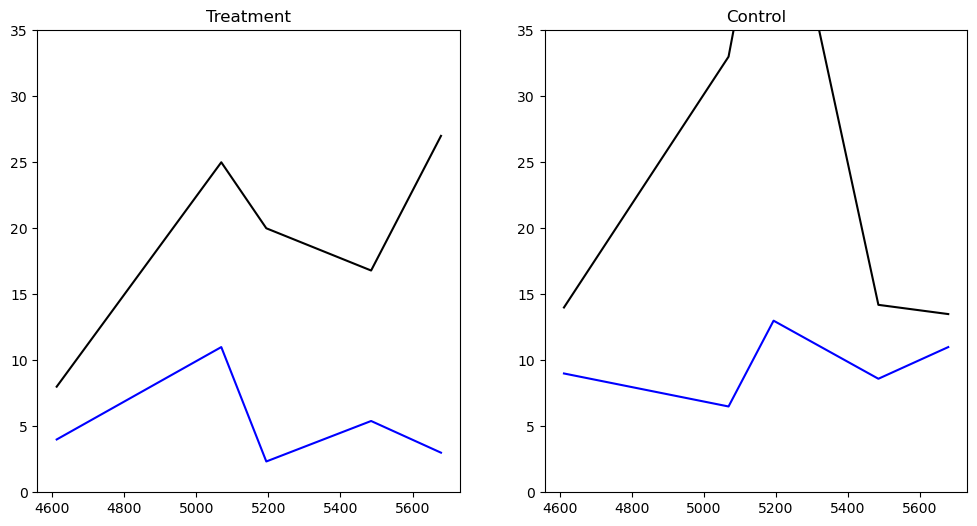

In [78]:
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.set_title('Treatment')
ax.plot(T_mean['issue'], color='blue', label='Treatment issue')
ax.plot(T_mean['problem'], color='black', label='Treatment problem')

ax2.set_title('Control')
ax2.plot(C_mean['issue'], color='blue', label='Control issue')
ax2.plot(C_mean['problem'], color='black', label='Control problem')

ax.set_ylim([0, 35])
ax2.set_ylim([0, 35])

plt.show()


In [79]:
dataBinary_milestones_valid

,PX,Participant,start,issue,problem,folder,file,class,method,line,solution,implement,end,group,issue_number
0,P0,ItaloSantos,2:35 PM,17,17,18.0,18.0,19.0,21.0,21.0,24.0,43.0,45,Control,5679
1,P1,FelipeFelixSantos@gmail.com,10:15 AM,2,3,44.0,45.0,45.0,46.0,47.0,48.0,50.0,55,Treatment,5485
2,P2,gk325@nau.edu,3:09:00 PM,1,6,56.0,56.0,58.0,NaN,NaN,NaN,NaN,58,Control,4612
3,P3,sb3292@nau.edu,4:21:00 PM,3,19,23.0,23.0,23.0,27.0,27.0,46.0,46.0,46,Treatment,5194
4,P4,gummadisk99@gmail.com,1:20 PM,4,14,38.0,38.0,38.0,41.0,41.0,50.0,56.0,56,Control,4612
5,P5,hk486@nau.edu,3:22 PM,20,25,31.0,31.0,31.0,32.0,33.0,37.0,38.0,38,Treatment,5069
7,P6,kv582@nau.edu,12:44 PM,11,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,Control,5485
8,P7,vg588@nau.edu,4:34 PM,5,25,35.0,35.0,35.0,37.0,37.0,37.0,46.0,46,Treatment,5485
9,P8,ma3932@nau.edu,4:13 PM,7,33,43.0,43.0,43.0,43.0,43.0,43.0,43.0,58,Treatment,5485
10,P9,"nk545@nau,edu",3:14 PM,7,22,25.0,25.0,37.0,46.0,57.0,57.0,NaN,57,Control,5069


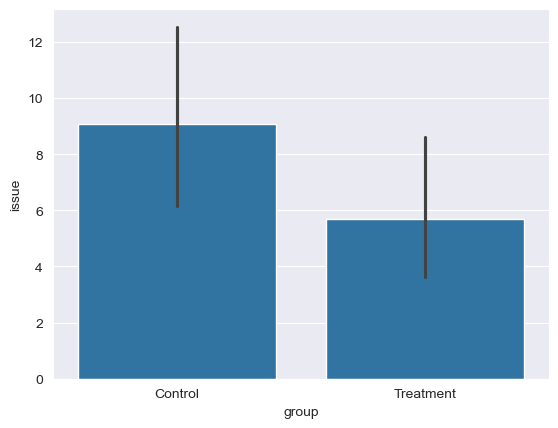

In [80]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "issue", data = dataBinary_milestones_valid)
plt.show()

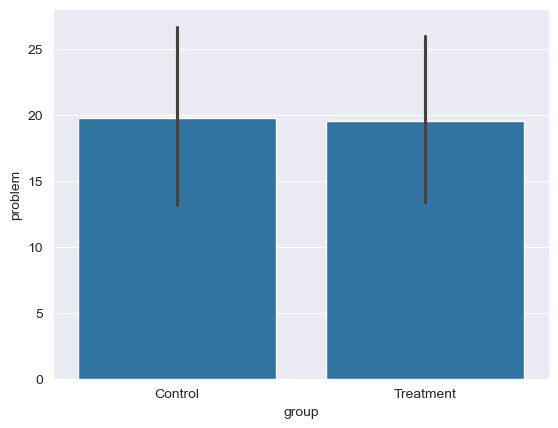

In [81]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "problem", data = dataBinary_milestones_valid)
plt.show()

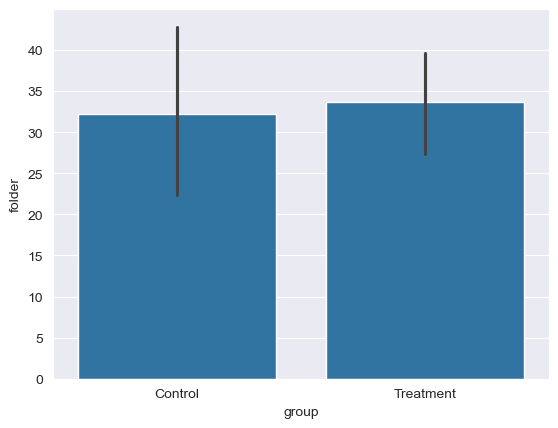

In [287]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "folder", data = dataBinary_milestones_valid)
plt.show()

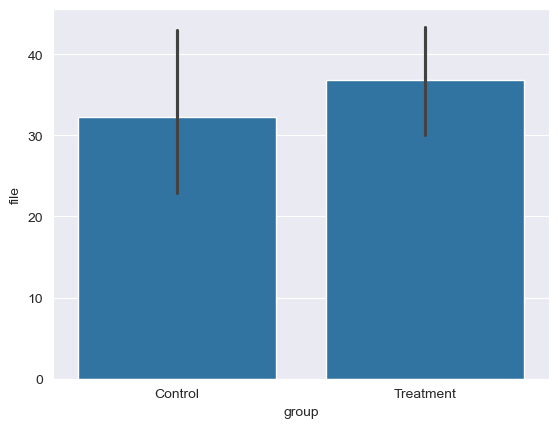

In [82]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "file", data = dataBinary_milestones_valid)
plt.show()

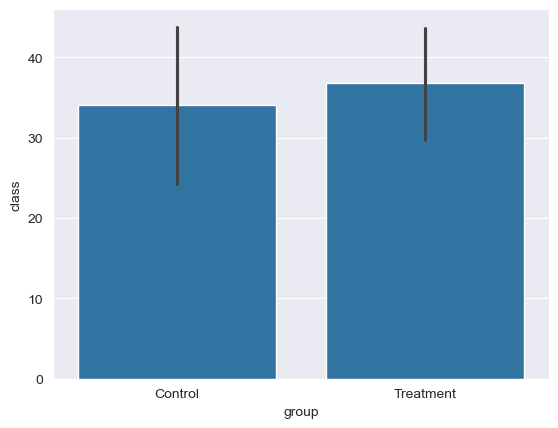

In [83]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "class", data = dataBinary_milestones_valid)
plt.show()

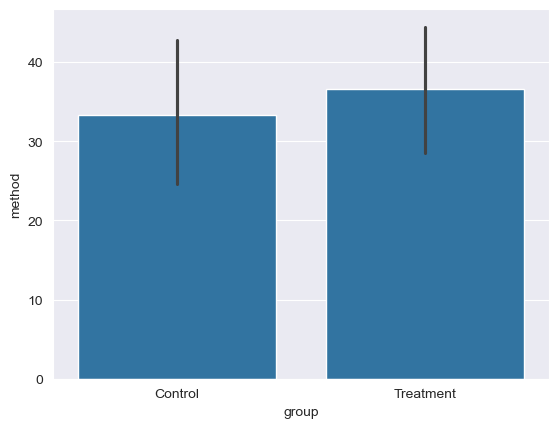

In [84]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "method", data = dataBinary_milestones_valid)
plt.show()

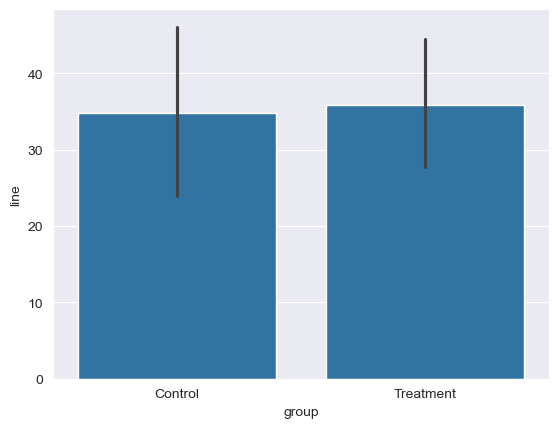

In [85]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "line", data = dataBinary_milestones_valid)
plt.show()

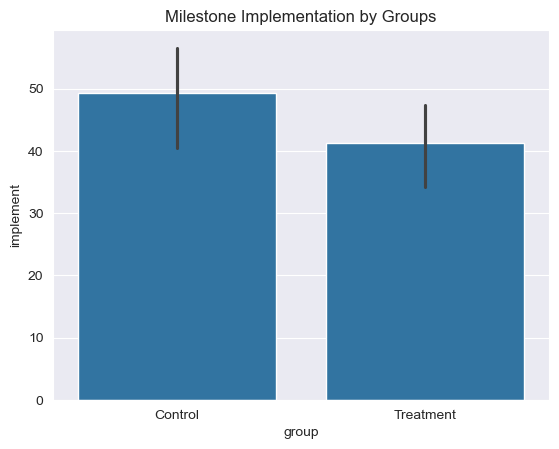

In [86]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "implement", data = dataBinary_milestones_valid)

plt.title("Milestone Implementation by Groups", size=12)

plt.savefig("Milestones_Implementation_bygroups.pdf")
plt.show()

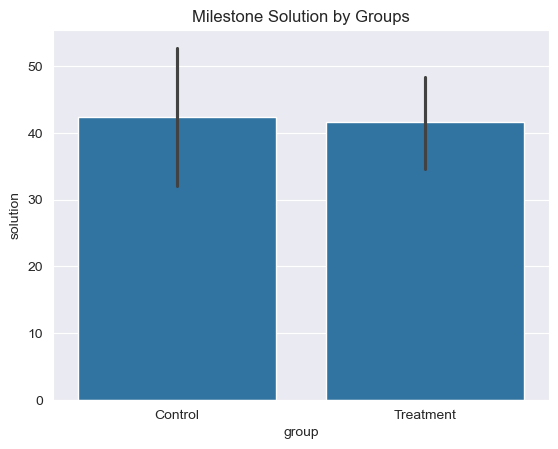

In [87]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "solution", data = dataBinary_milestones_valid)
plt.title("Milestone Solution by Groups", size=12)

plt.savefig("Milestones_Solution_bygroups.pdf")
plt.show()

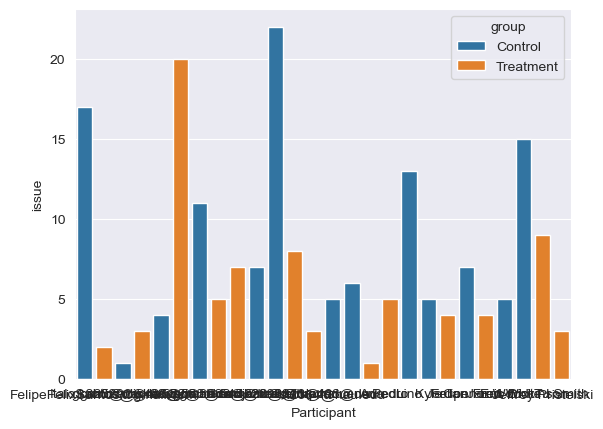

In [88]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "Participant", y = "issue", hue = "group", data = dataBinary_milestones_valid)
plt.show()

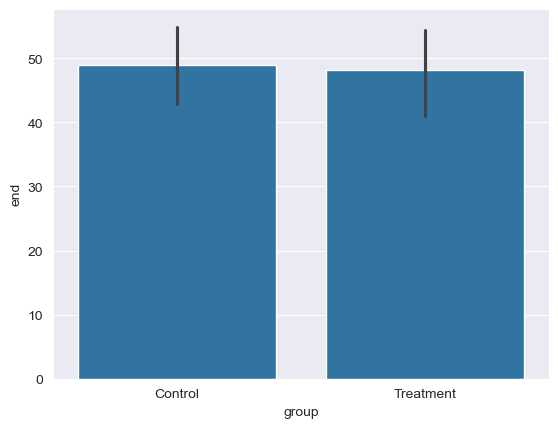

In [89]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "end", data = dataBinary_milestones_valid)
plt.show()

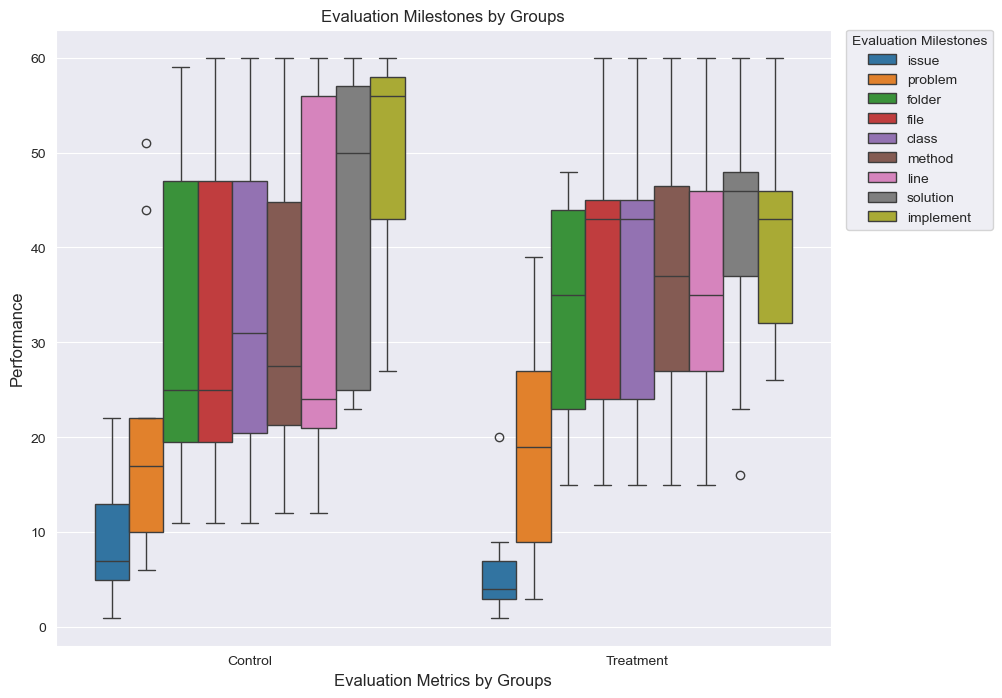

<Figure size 640x480 with 0 Axes>

In [90]:
dd=pd.melt(dataBinary_milestones_valid_60,id_vars=['group'],value_vars=['issue','problem','folder','file','class','method','line','solution','implement'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='group',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by Groups",size=12)

labels=['issue','problem','folder','file','class','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Evaluation Milestones by Groups", size=12)
plt.show()
plt.savefig("grouped_milestones_bygroups_60.pdf")


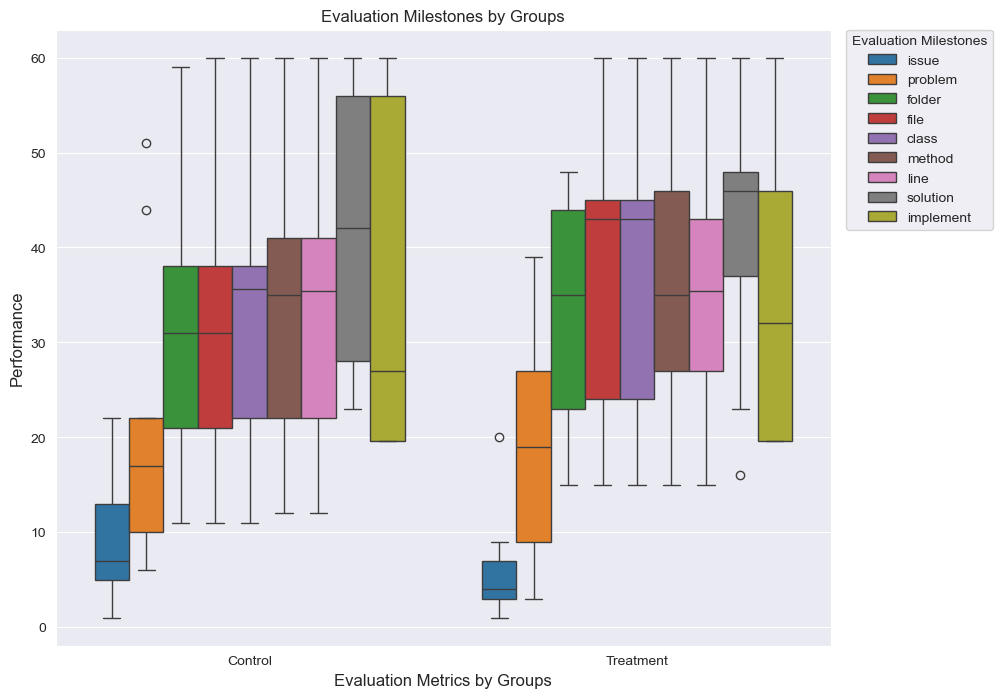

<Figure size 640x480 with 0 Axes>

In [91]:
dd=pd.melt(dataBinary_milestones_valid_mean,id_vars=['group'],value_vars=['issue','problem','folder','file','class','method','line','solution','implement'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='group',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by Groups",size=12)

labels=['issue','problem','folder','file','class','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Evaluation Milestones by Groups", size=12)
plt.show()
plt.savefig("grouped_milestones_bygroups_means.pdf")


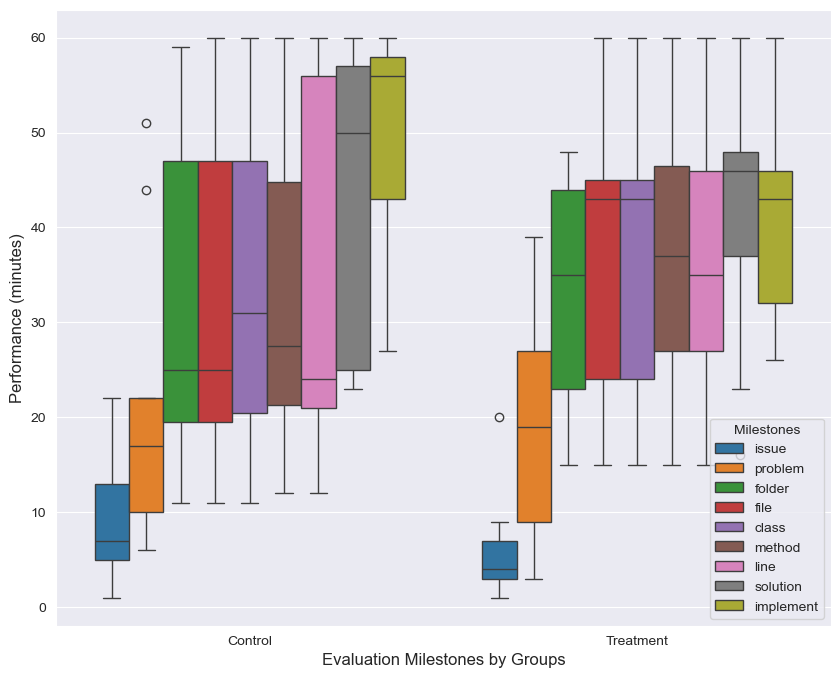

In [92]:
dd=pd.melt(dataBinary_milestones_valid,id_vars=['group'],value_vars=['issue','problem','folder','file','class','method','line','solution','implement'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='group',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance (minutes)", size=12)
plt.xlabel("Evaluation Milestones by Groups",size=12)

labels=['issue','problem','folder','file','class','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
#ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=9, borderaxespad=0.)
ax.legend(h, labels, title="Milestones")
#plt.title("Evaluation Milestones by Groups", size=12)
plt.savefig("grouped_milestones_bygroups.pdf")
plt.show()


In [93]:
dd=pd.melt(dataBinary_milestones_valid_NA,id_vars=['group'],value_vars=['issue','problem','folder','file','class','method','line','solution','implement'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='group',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by Groups",size=12)

labels=['issue','problem','folder','file','class','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Evaluation Milestones by Groups", size=12)
plt.show()
plt.savefig("grouped_milestones_bygroups_NA.pdf")


NameError: name 'dataBinary_milestones_valid_NA' is not defined

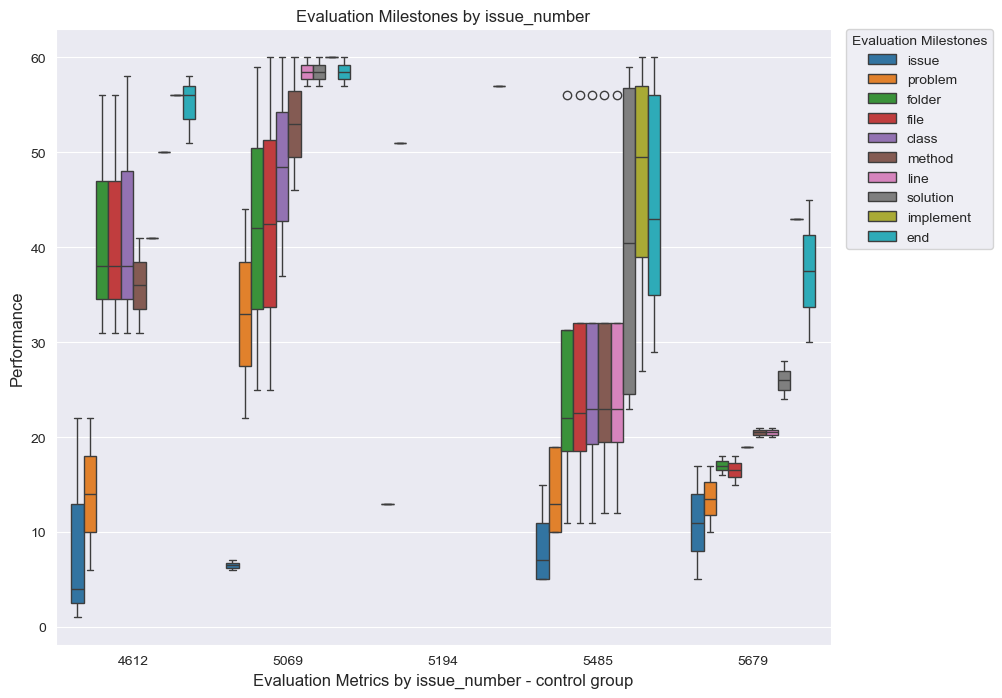

In [94]:
dd=pd.melt(dataBinary_milestones_valid_C,id_vars=['issue_number'],value_vars=['issue','problem','folder','file','class','method','line','solution','implement','end'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='issue_number',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by issue_number - control group",size=12)

labels=['issue','problem','folder','file','class','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Evaluation Milestones by issue_number", size=12)
plt.show()

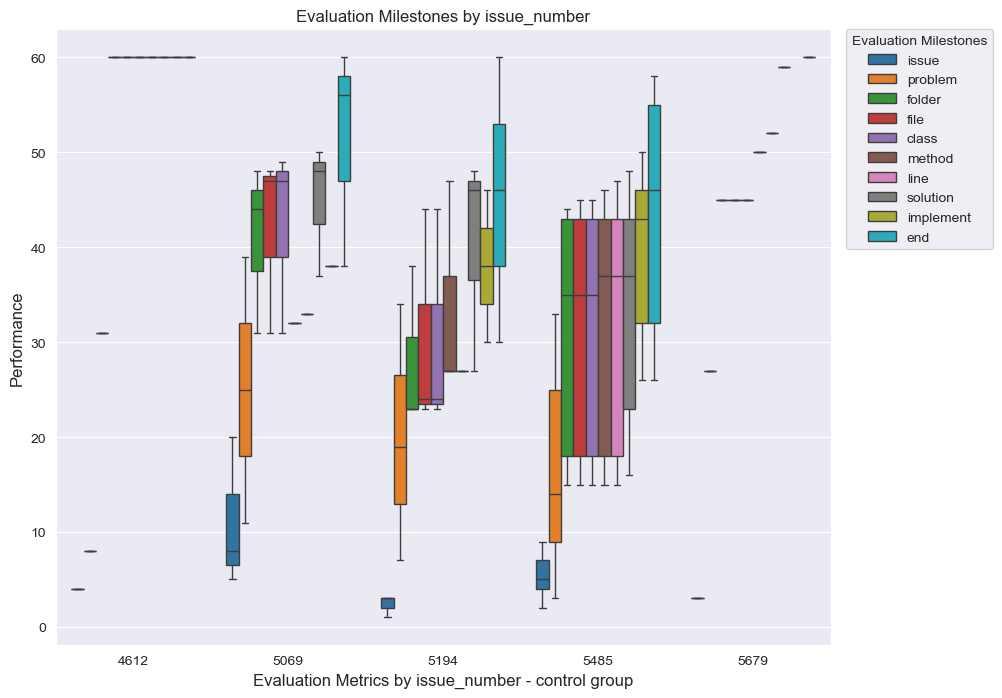

In [95]:
dd=pd.melt(dataBinary_milestones_valid_T,id_vars=['issue_number'],value_vars=['issue','problem','folder','file','class','method','line','solution','implement','end'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='issue_number',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by issue_number - control group",size=12)

labels=['issue','problem','folder','file','class','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Evaluation Milestones by issue_number", size=12)
plt.show()

In [96]:
dataBinary_milestones_valid_5485 = dataBinary_milestones_valid[dataBinary_milestones_valid.issue_number == 5485]

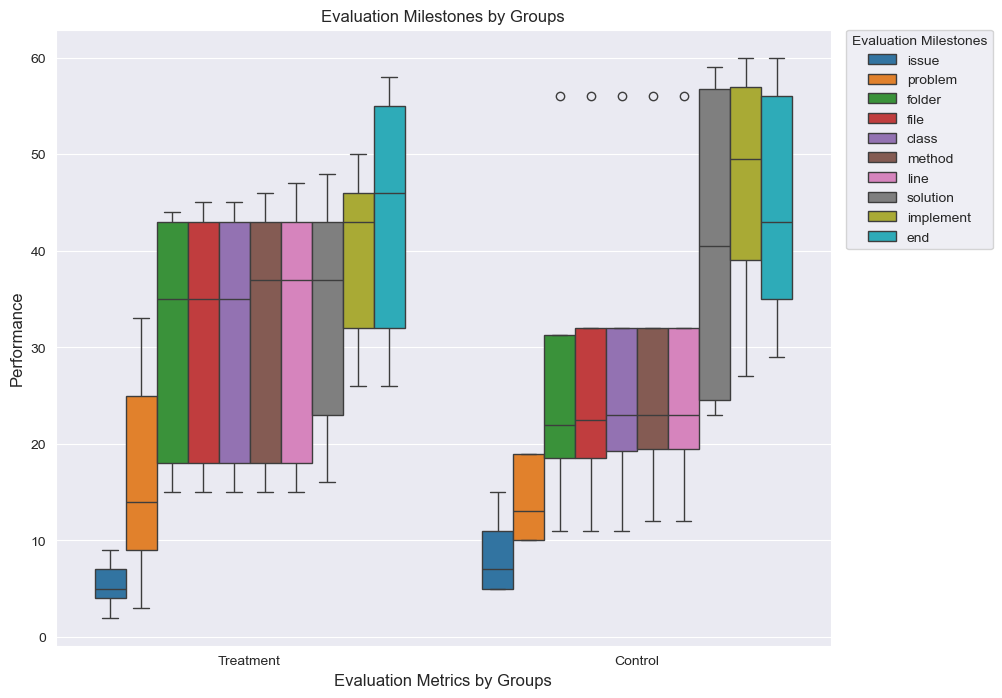

In [97]:
dd=pd.melt(dataBinary_milestones_valid_5485,id_vars=['group'],value_vars=['issue','problem','folder','file','class','method','line','solution','implement','end'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='group',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by Groups",size=12)

labels=['issue','problem','folder','file','class','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Evaluation Milestones by Groups", size=12)
plt.show()
#plt.savefig("grouped_boxplot_AlgorithmBinary.png")

In [98]:
dataBinary_milestones_valid_5485

,PX,Participant,start,issue,problem,folder,file,class,method,line,solution,implement,end,group,issue_number
1,P1,FelipeFelixSantos@gmail.com,10:15 AM,2,3,44.0,45.0,45.0,46.0,47.0,48.0,50.0,55,Treatment,5485
7,P6,kv582@nau.edu,12:44 PM,11,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,Control,5485
8,P7,vg588@nau.edu,4:34 PM,5,25,35.0,35.0,35.0,37.0,37.0,37.0,46.0,46,Treatment,5485
9,P8,ma3932@nau.edu,4:13 PM,7,33,43.0,43.0,43.0,43.0,43.0,43.0,43.0,58,Treatment,5485
14,P13,st2364@nau.edu,3:09 PM,5,10,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56,Control,5485
20,P19,Jordan,5:13 PM,4,9,18.0,18.0,18.0,18.0,18.0,23.0,32.0,32,Treatment,5485
21,P10,Felipe Fron,3:10 PM,7,13,23.0,24.0,24.0,24.0,24.0,25.0,27.0,29,Control,5485
23,P22,Jared White,7:06 PM,5,10,11.0,11.0,11.0,12.0,12.0,59.0,60.0,60,Control,5485
24,P23,Eric Dickinson,3:15 PM,15,19,21.0,21.0,22.0,22.0,22.0,23.0,43.0,43,Control,5485
25,P24,Jeffrey Pristelski,5:29 PM,9,14,15.0,15.0,15.0,15.0,15.0,16.0,26.0,26,Treatment,5485


In [99]:
#dataBinary_milestones_valid_5485.groupby(['group']).mean()

In [100]:
dataBinary_milestones_valid_4612 = dataBinary_milestones_valid[dataBinary_milestones_valid.issue_number == 4612]

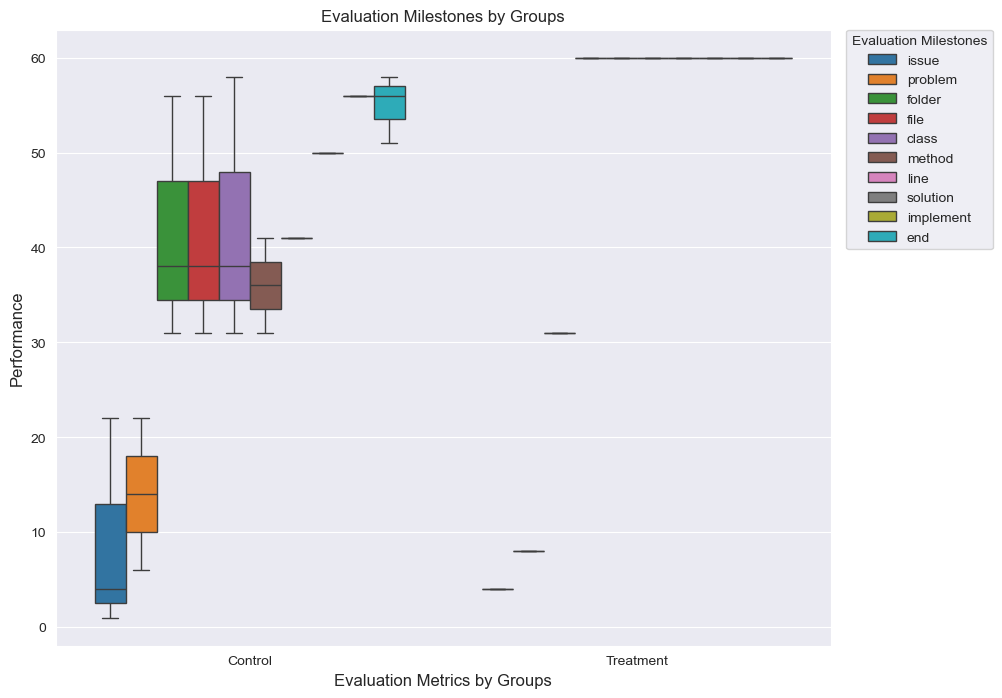

In [101]:
dd=pd.melt(dataBinary_milestones_valid_4612,id_vars=['group'],value_vars=['issue','problem','folder','file','class','method','line','solution','implement','end'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='group',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by Groups",size=12)

labels=['issue','problem','folder','file','class','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Evaluation Milestones by Groups", size=12)
plt.show()
#plt.savefig("grouped_boxplot_AlgorithmBinary.png")

In [102]:
#dataBinary_milestones_valid_4612.groupby(['group']).mean()

In [103]:
dataBinary_milestones_valid_4612

,PX,Participant,start,issue,problem,folder,file,class,method,line,solution,implement,end,group,issue_number
2,P2,gk325@nau.edu,3:09:00 PM,1,6,56.0,56.0,58.0,NaN,NaN,NaN,NaN,58,Control,4612
4,P4,gummadisk99@gmail.com,1:20 PM,4,14,38.0,38.0,38.0,41.0,41.0,50.0,56.0,56,Control,4612
11,P10,sm4332@nau.edu,3:12 PM,22,22,31.0,31.0,31.0,31.0,NaN,NaN,NaN,51,Control,4612
22,P21,Connor Wood,3:30 PM,4,8,31.0,60.0,60.0,60.0,60.0,60.0,60.0,60,Treatment,4612


In [104]:
dataBinary_milestones_valid_5069 = dataBinary_milestones_valid[dataBinary_milestones_valid.issue_number == 5069]

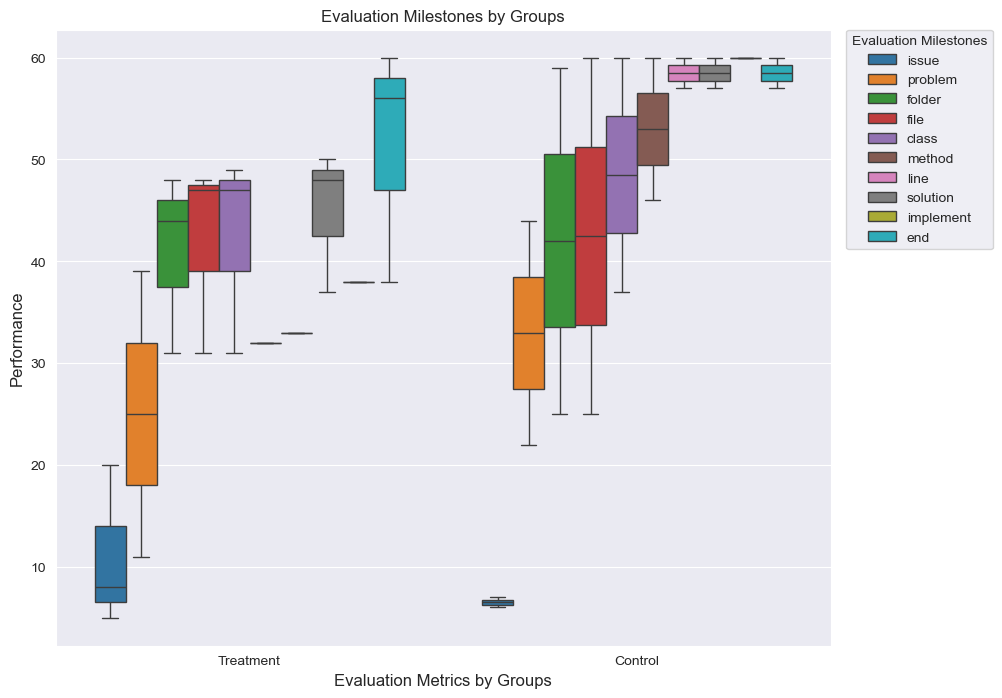

In [105]:
dd=pd.melt(dataBinary_milestones_valid_5069,id_vars=['group'],value_vars=['issue','problem','folder','file','class','method','line','solution','implement','end'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='group',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by Groups",size=12)

labels=['issue','problem','folder','file','class','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Evaluation Milestones by Groups", size=12)
plt.show()
#plt.savefig("grouped_boxplot_AlgorithmBinary.png")

In [106]:
#dataBinary_milestones_valid_5069.groupby(['group']).mean()

In [107]:
dataBinary_milestones_valid_5069

,PX,Participant,start,issue,problem,folder,file,class,method,line,solution,implement,end,group,issue_number
5,P5,hk486@nau.edu,3:22 PM,20,25,31.0,31.0,31.0,32.0,33.0,37.0,38.0,38,Treatment,5069
10,P9,"nk545@nau,edu",3:14 PM,7,22,25.0,25.0,37.0,46.0,57.0,57.0,NaN,57,Control,5069
12,P11,jk2396@nau.edu,5:03 PM,8,39,44.0,47.0,47.0,NaN,NaN,48.0,NaN,56,Treatment,5069
15,P14,klp468@nau.edu,12:18 PM,6,44,59.0,60.0,60.0,60.0,60.0,60.0,60.0,60,Control,5069
17,P16,Pedro,9:36 AM,5,11,48.0,48.0,49.0,NaN,NaN,50.0,NaN,60,Treatment,5069


In [108]:
#dataBinary_milestones_valid.groupby(['group']).mean()

In [109]:
def cliffsDelta(lst1, lst2, **dull):

    """Returns delta and true if there are more than 'dull' differences"""
    if not dull:
        dull = {'small': 0.147, 'medium': 0.33, 'large': 0.474} # effect sizes from (Hess and Kromrey, 2004)
    m, n = len(lst1), len(lst2)
    lst2 = sorted(lst2)
    j = more = less = 0
    for repeats, x in runs(sorted(lst1)):
        while j <= (n - 1) and lst2[j] < x:
            j += 1
        more += j*repeats
        while j <= (n - 1) and lst2[j] == x:
            j += 1
        less += (n - j)*repeats
    d = (more - less) / (m*n)
    size = lookup_size(d, dull)
    return d, size


def lookup_size(delta: float, dull: dict) -> str:
    """
    :type delta: float
    :type dull: dict, a dictionary of small, medium, large thresholds.
    """
    delta = abs(delta)
    if delta < dull['small']:
        return 'negligible'
    if dull['small'] <= delta < dull['medium']:
        return 'small'
    if dull['medium'] <= delta < dull['large']:
        return 'medium'
    if delta >= dull['large']:
        return 'large'


def runs(lst):
    """Iterator, chunks repeated values"""
    for j, two in enumerate(lst):
        if j == 0:
            one, i = two, 0
        if one != two:
            yield j - i, one
            i = j
        one = two
    yield j - i + 1, two

In [110]:
#https://machinelearningmastery.com/effect-size-measures-in-python/
#Small Effect Size: d=0.20
#Medium Effect Size: d=0.50
#Large Effect Size: d=0.80

from numpy import mean
from numpy import var
from math import sqrt

def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = mean(d1), mean(d2)
	# calculate the effect size
	return (u1 - u2) / s


In [317]:
#dataBinary_milestones_valid_0=dataBinary_milestones_valid.fillna(0)
#dataBinary_milestones_valid_0

In [111]:
dataBinary_milestones_valid_NA=dataBinary_milestones_valid.dropna()
dataBinary_milestones_valid_NA

,PX,Participant,start,issue,problem,folder,file,class,method,line,solution,implement,end,group,issue_number
0,P0,ItaloSantos,2:35 PM,17,17,18.0,18.0,19.0,21.0,21.0,24.0,43.0,45,Control,5679
1,P1,FelipeFelixSantos@gmail.com,10:15 AM,2,3,44.0,45.0,45.0,46.0,47.0,48.0,50.0,55,Treatment,5485
3,P3,sb3292@nau.edu,4:21:00 PM,3,19,23.0,23.0,23.0,27.0,27.0,46.0,46.0,46,Treatment,5194
4,P4,gummadisk99@gmail.com,1:20 PM,4,14,38.0,38.0,38.0,41.0,41.0,50.0,56.0,56,Control,4612
5,P5,hk486@nau.edu,3:22 PM,20,25,31.0,31.0,31.0,32.0,33.0,37.0,38.0,38,Treatment,5069
8,P7,vg588@nau.edu,4:34 PM,5,25,35.0,35.0,35.0,37.0,37.0,37.0,46.0,46,Treatment,5485
9,P8,ma3932@nau.edu,4:13 PM,7,33,43.0,43.0,43.0,43.0,43.0,43.0,43.0,58,Treatment,5485
14,P13,st2364@nau.edu,3:09 PM,5,10,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56,Control,5485
15,P14,klp468@nau.edu,12:18 PM,6,44,59.0,60.0,60.0,60.0,60.0,60.0,60.0,60,Control,5069
20,P19,Jordan,5:13 PM,4,9,18.0,18.0,18.0,18.0,18.0,23.0,32.0,32,Treatment,5485


In [112]:
DF_valid_C = dataBinary_milestones_valid[dataBinary_milestones_valid.group == 'Control']
Val_C_I = DF_valid_C['issue'] 
Val_C_P = DF_valid_C['problem'] 
Val_C_Fo = DF_valid_C['folder'] 
Val_C_Fi = DF_valid_C['file'] 
Val_C_C = DF_valid_C['class'] 
Val_C_M = DF_valid_C['method']
Val_C_L = DF_valid_C['line'] 
Val_C_S = DF_valid_C['solution'] 
Val_C_Im = DF_valid_C['implement']
Val_C_E = DF_valid_C['end']


In [113]:
Val_C_Fo = Val_C_Fo.dropna()
Val_C_Fo

0     18.0
2     56.0
4     38.0
10    25.0
11    31.0
14    56.0
15    59.0
19    16.0
21    23.0
23    11.0
24    21.0
Name: folder, dtype: float64

In [114]:
Val_C_Fi = Val_C_Fi.dropna()
Val_C_Fi

0     18.0
2     56.0
4     38.0
10    25.0
11    31.0
14    56.0
15    60.0
19    15.0
21    24.0
23    11.0
24    21.0
Name: file, dtype: float64

In [115]:
Val_C_C = Val_C_C.dropna()
Val_C_C

0     19.0
2     58.0
4     38.0
10    37.0
11    31.0
14    56.0
15    60.0
19    19.0
21    24.0
23    11.0
24    22.0
Name: class, dtype: float64

In [116]:
Val_C_M = Val_C_M.dropna()
Val_C_M

0     21.0
4     41.0
10    46.0
11    31.0
14    56.0
15    60.0
19    20.0
21    24.0
23    12.0
24    22.0
Name: method, dtype: float64

In [117]:
Val_C_L = Val_C_L.dropna()
Val_C_L

0     21.0
4     41.0
10    57.0
14    56.0
15    60.0
19    20.0
21    24.0
23    12.0
24    22.0
Name: line, dtype: float64

In [118]:
Val_C_S = Val_C_S.dropna()
Val_C_S

0     24.0
4     50.0
10    57.0
14    56.0
15    60.0
19    28.0
21    25.0
23    59.0
24    23.0
Name: solution, dtype: float64

In [119]:
Val_C_Im = Val_C_Im.dropna()
Val_C_Im

0     43.0
4     56.0
14    56.0
15    60.0
21    27.0
23    60.0
24    43.0
Name: implement, dtype: float64

In [120]:
Val_C_E = Val_C_E.dropna()
Val_C_E

0     45
2     58
4     56
7     35
10    57
11    51
14    56
15    60
18    57
19    30
21    29
23    60
24    43
Name: end, dtype: int64

In [121]:
DF_valid_T = dataBinary_milestones_valid[dataBinary_milestones_valid.group == 'Treatment']
Val_T_I = DF_valid_T['issue'] 
Val_T_P = DF_valid_T['problem'] 
Val_T_Fo = DF_valid_T['folder'] 
Val_T_Fi = DF_valid_T['file'] 
Val_T_C = DF_valid_T['class'] 
Val_T_M = DF_valid_T['method']
Val_T_L = DF_valid_T['line'] 
Val_T_S = DF_valid_T['solution'] 
Val_T_Im = DF_valid_T['implement']
Val_T_E = DF_valid_T['end']

In [122]:
Val_T_Fo

1     44.0
3     23.0
5     31.0
8     35.0
9     43.0
12    44.0
13    45.0
16    38.0
17    48.0
20    18.0
22    31.0
25    15.0
26    23.0
Name: folder, dtype: float64

In [123]:
Val_T_Fi 

1     45.0
3     23.0
5     31.0
8     35.0
9     43.0
12    47.0
13    45.0
16    44.0
17    48.0
20    18.0
22    60.0
25    15.0
26    24.0
Name: file, dtype: float64

In [331]:
Val_T_C

1     45.0
3     23.0
5     31.0
8     35.0
9     43.0
12    47.0
13    45.0
16    44.0
17    49.0
20    18.0
22    60.0
25    15.0
26    24.0
Name: class, dtype: float64

In [124]:
Val_T_M = Val_T_M.dropna()
Val_T_M

1     46.0
3     27.0
5     32.0
8     37.0
9     43.0
13    50.0
16    47.0
20    18.0
22    60.0
25    15.0
26    27.0
Name: method, dtype: float64

In [125]:
Val_T_L = Val_T_L.dropna()
Val_T_L

1     47.0
3     27.0
5     33.0
8     37.0
9     43.0
13    52.0
20    18.0
22    60.0
25    15.0
26    27.0
Name: line, dtype: float64

In [126]:
Val_T_S = Val_T_S.dropna()
Val_T_S

1     48.0
3     46.0
5     37.0
8     37.0
9     43.0
12    48.0
13    59.0
16    48.0
17    50.0
20    23.0
22    60.0
25    16.0
26    27.0
Name: solution, dtype: float64

In [127]:
Val_T_Im = Val_T_Im.dropna()
Val_T_Im

1     50.0
3     46.0
5     38.0
8     46.0
9     43.0
20    32.0
22    60.0
25    26.0
26    30.0
Name: implement, dtype: float64

In [128]:
Val_T_E = Val_T_E.dropna()
Val_T_E

1     55
3     46
5     38
8     46
9     58
12    56
13    60
16    60
17    60
20    32
22    60
25    26
26    30
Name: end, dtype: int64

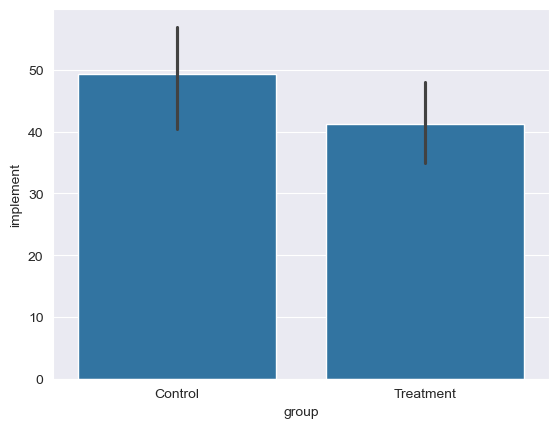

In [337]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "implement", data = dataBinary_milestones_valid)
plt.show()

In [129]:
DF_valid_C_NA = dataBinary_milestones_valid_NA[dataBinary_milestones_valid_NA.group == 'Control']
Val_C_I_NA = DF_valid_C_NA['issue'] 
Val_C_P_NA = DF_valid_C_NA['problem'] 
Val_C_Fo_NA = DF_valid_C_NA['folder'] 
Val_C_Fi_NA = DF_valid_C_NA['file'] 
Val_C_C_NA = DF_valid_C_NA['class'] 
Val_C_M_NA = DF_valid_C_NA['method']
Val_C_L_NA = DF_valid_C_NA['line'] 
Val_C_S_NA = DF_valid_C_NA['solution'] 
Val_C_Im_NA = DF_valid_C_NA['implement']
Val_C_E_NA = DF_valid_C_NA['end']


In [130]:
DF_valid_T_NA = dataBinary_milestones_valid_NA[dataBinary_milestones_valid_NA.group == 'Treatment']
Val_T_I_NA = DF_valid_T_NA['issue'] 
Val_T_P_NA = DF_valid_T_NA['problem'] 
Val_T_Fo_NA = DF_valid_T_NA['folder'] 
Val_T_Fi_NA = DF_valid_T_NA['file'] 
Val_T_C_NA = DF_valid_T_NA['class'] 
Val_T_M_NA = DF_valid_T_NA['method']
Val_T_L_NA = DF_valid_T_NA['line'] 
Val_T_S_NA = DF_valid_T_NA['solution'] 
Val_T_Im_NA = DF_valid_T_NA['implement']
Val_T_E_NA = DF_valid_T_NA['end']

In [131]:
DF_valid_mean_C = dataBinary_milestones_valid_mean[dataBinary_milestones_valid_mean.group == 'Control']
Val_m_C_I = DF_valid_mean_C['issue'] 
Val_m_C_P = DF_valid_mean_C['problem'] 
Val_m_C_Fo = DF_valid_mean_C['folder'] 
Val_m_C_Fi = DF_valid_mean_C['file'] 
Val_m_C_C = DF_valid_mean_C['class'] 
Val_m_C_M = DF_valid_mean_C['method']
Val_m_C_L = DF_valid_mean_C['line'] 
Val_m_C_S = DF_valid_mean_C['solution'] 
Val_m_C_Im = DF_valid_mean_C['implement']
Val_m_C_E = DF_valid_mean_C['end']


In [132]:
DF_valid_mean_T = dataBinary_milestones_valid_mean[dataBinary_milestones_valid_mean.group == 'Treatment']
Val_m_T_I = DF_valid_mean_T['issue'] 
Val_m_T_P = DF_valid_mean_T['problem'] 
Val_m_T_Fo = DF_valid_mean_T['folder'] 
Val_m_T_Fi = DF_valid_mean_T['file'] 
Val_m_T_C = DF_valid_mean_T['class'] 
Val_m_T_M = DF_valid_mean_T['method']
Val_m_T_L = DF_valid_mean_T['line'] 
Val_m_T_S = DF_valid_mean_T['solution'] 
Val_m_T_Im = DF_valid_mean_T['implement']
Val_m_T_E = DF_valid_mean_T['end']


In [133]:
DF_valid_60_C = dataBinary_milestones_valid_60[dataBinary_milestones_valid_60.group == 'Control']
Val_60_C_I = DF_valid_60_C['issue'] 
Val_60_C_P = DF_valid_60_C['problem'] 
Val_60_C_Fo = DF_valid_60_C['folder'] 
Val_60_C_Fi = DF_valid_60_C['file'] 
Val_60_C_C = DF_valid_60_C['class'] 
Val_60_C_M = DF_valid_60_C['method']
Val_60_C_L = DF_valid_60_C['line'] 
Val_60_C_S = DF_valid_60_C['solution'] 
Val_60_C_Im = DF_valid_60_C['implement']
Val_60_C_E = DF_valid_60_C['end']


In [134]:
DF_valid_60_T = dataBinary_milestones_valid_60[dataBinary_milestones_valid_60.group == 'Treatment']
Val_60_T_I = DF_valid_60_T['issue'] 
Val_60_T_P = DF_valid_60_T['problem'] 
Val_60_T_Fo = DF_valid_60_T['folder'] 
Val_60_T_Fi = DF_valid_60_T['file'] 
Val_60_T_C = DF_valid_60_T['class'] 
Val_60_T_M = DF_valid_60_T['method']
Val_60_T_L = DF_valid_60_T['line'] 
Val_60_T_S = DF_valid_60_T['solution'] 
Val_60_T_Im = DF_valid_60_T['implement']
Val_60_T_E = DF_valid_60_T['end']



In [135]:
#### MANN-U Independent Samples
from scipy.stats import mannwhitneyu

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

##### Defining variables to be comparede

# compare samples
stat, p = mannwhitneyu(Val_C_I, Val_T_I)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_C_I(fail to reject H0)')
else:
	print('Different distribution Val_C_I(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_C_I', cliffsDelta(Val_C_I, Val_T_I))

# compare samples -----
stat, p = mannwhitneyu(Val_C_P, Val_T_P)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_C_P(fail to reject H0)')
else:
	print('Different distribution Val_C_P(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_C_P', cliffsDelta(Val_C_P, Val_T_P))

# compare samples-----------
stat, p = mannwhitneyu(Val_C_Fo, Val_T_Fo)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_C_Fo(fail to reject H0)')
else:
	print('Different distribution Val_C_Fo(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_C_Fo', cliffsDelta(Val_C_Fo, Val_T_Fo))

# compare samples-----------
stat, p = mannwhitneyu(Val_C_Fi, Val_T_Fi)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_C_Fi(fail to reject H0)')
else:
	print('Different distribution Val_C_Fi(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_C_Fi', cliffsDelta(Val_C_Fi, Val_T_Fi))

# compare samples-----------
stat, p = mannwhitneyu(Val_C_C, Val_T_C)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_C_C(fail to reject H0)')
else:
	print('Different distribution Val_C_C(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_C_C', cliffsDelta(Val_C_C, Val_T_C))

# compare samples-----------
stat, p = mannwhitneyu(Val_C_M, Val_T_M)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_C_M(fail to reject H0)')
else:
	print('Different distribution Val_C_M(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_C_M', cliffsDelta(Val_C_M, Val_T_M))

# compare samples-----------
stat, p = mannwhitneyu(Val_C_L, Val_T_L)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_C_L(fail to reject H0)')
else:
	print('Different distribution Val_C_L(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_C_L', cliffsDelta(Val_C_L, Val_T_L))

# compare samples-----------
stat, p = mannwhitneyu(Val_C_S, Val_T_S)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_C_S(fail to reject H0)')
else:
	print('Different distribution Val_C_S(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_C_S', cliffsDelta(Val_C_S, Val_T_S))

# compare samples-----------
stat, p = mannwhitneyu(Val_C_Im, Val_T_Im)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_C_Im(fail to reject H0)')
else:
	print('Different distribution Val_C_Im(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_C_Im', cliffsDelta(Val_C_Im, Val_T_Im))


Statistics=119.500, p=0.075
Same distribution Val_C_I(fail to reject H0)
Val_C_I (0.41420118343195267, 'medium')
Statistics=82.500, p=0.939
Same distribution Val_C_P(fail to reject H0)
Val_C_P (-0.023668639053254437, 'negligible')
Statistics=63.000, p=0.642
Same distribution Val_C_Fo(fail to reject H0)
Val_C_Fo (-0.11888111888111888, 'negligible')
Statistics=58.500, p=0.468
Same distribution Val_C_Fi(fail to reject H0)
Val_C_Fi (-0.18181818181818182, 'small')
Statistics=62.500, p=0.622
Same distribution Val_C_C(fail to reject H0)
Val_C_C (-0.1258741258741259, 'negligible')
Statistics=46.000, p=0.549
Same distribution Val_C_M(fail to reject H0)
Val_C_M (-0.16363636363636364, 'small')
Statistics=41.500, p=0.806
Same distribution Val_C_L(fail to reject H0)
Val_C_L (-0.07777777777777778, 'negligible')
Statistics=65.000, p=0.688
Same distribution Val_C_S(fail to reject H0)
Val_C_S (0.1111111111111111, 'negligible')
Statistics=43.000, p=0.241
Same distribution Val_C_Im(fail to reject H0)
Val

In [136]:
#### MANN-U Independent Samples
from scipy.stats import mannwhitneyu

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

##### Defining variables to be comparede

# compare samples
stat, p = mannwhitneyu(Val_m_C_I, Val_m_T_I)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_m_C_I(fail to reject H0)')
else:
	print('Different distribution Val_m_C_I(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_m_C_I', cliffsDelta(Val_m_C_I, Val_m_T_I))

# compare samples -----
stat, p = mannwhitneyu(Val_m_C_P, Val_m_T_P)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_m_C_P(fail to reject H0)')
else:
	print('Different distribution Val_m_C_P(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_m_C_P', cliffsDelta(Val_m_C_P, Val_m_T_P))

# compare samples-----------
stat, p = mannwhitneyu(Val_m_C_Fo, Val_m_T_Fo)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_m_C_Fo(fail to reject H0)')
else:
	print('Different distribution Val_m_C_Fo(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_m_T_P', cliffsDelta(Val_m_C_Fo, Val_m_T_Fo))

# compare samples-----------
stat, p = mannwhitneyu(Val_m_C_Fi, Val_m_T_Fi)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_m_C_Fi(fail to reject H0)')
else:
	print('Different distribution Val_m_C_Fi(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_m_C_Fi', cliffsDelta(Val_m_C_Fi, Val_m_T_Fi))

# compare samples-----------
stat, p = mannwhitneyu(Val_m_C_C, Val_m_T_C)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_m_C_C(fail to reject H0)')
else:
	print('Different distribution Val_m_C_C(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_m_C_C', cliffsDelta(Val_m_C_C, Val_m_T_C))

# compare samples-----------
stat, p = mannwhitneyu(Val_m_C_M, Val_m_T_M)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_m_C_M(fail to reject H0)')
else:
	print('Different distribution Val_m_C_M(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_m_C_M', cliffsDelta(Val_m_C_M, Val_m_T_M))

# compare samples-----------
stat, p = mannwhitneyu(Val_m_C_L, Val_m_T_L)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_m_C_L(fail to reject H0)')
else:
	print('Different distribution Val_m_C_L(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_m_C_L', cliffsDelta(Val_m_C_L, Val_m_T_L))

# compare samples-----------
stat, p = mannwhitneyu(Val_m_C_S, Val_m_T_S)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_m_C_S(fail to reject H0)')
else:
	print('Different distribution Val_m_C_S(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_m_C_S', cliffsDelta(Val_m_C_S, Val_m_T_S))

# compare samples-----------
stat, p = mannwhitneyu(Val_m_C_Im, Val_m_T_Im)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_m_C_Im(fail to reject H0)')
else:
	print('Different distribution Val_m_C_Im(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_m_C_Im', cliffsDelta(Val_m_C_Im, Val_m_T_Im))


Statistics=119.500, p=0.075
Same distribution Val_m_C_I(fail to reject H0)
Val_m_C_I (0.41420118343195267, 'medium')
Statistics=82.500, p=0.939
Same distribution Val_m_C_P(fail to reject H0)
Val_m_C_P (-0.023668639053254437, 'negligible')
Statistics=75.000, p=0.644
Same distribution Val_m_C_Fo(fail to reject H0)
Val_m_T_P (-0.11242603550295859, 'negligible')
Statistics=68.500, p=0.426
Same distribution Val_m_C_Fi(fail to reject H0)
Val_m_C_Fi (-0.1893491124260355, 'small')
Statistics=74.500, p=0.626
Same distribution Val_m_C_C(fail to reject H0)
Val_m_C_C (-0.11834319526627218, 'negligible')
Statistics=72.000, p=0.537
Same distribution Val_m_C_M(fail to reject H0)
Val_m_C_M (-0.14792899408284024, 'small')
Statistics=79.500, p=0.816
Same distribution Val_m_C_L(fail to reject H0)
Val_m_C_L (-0.05917159763313609, 'negligible')
Statistics=85.000, p=1.000
Same distribution Val_m_C_S(fail to reject H0)
Val_m_C_S (0.005917159763313609, 'negligible')
Statistics=83.000, p=0.958
Same distributio

In [137]:
#### MANN-U Independent Samples
from scipy.stats import mannwhitneyu

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

##### Defining variables to be comparede

# compare samples
stat, p = mannwhitneyu(Val_60_C_I, Val_60_T_I)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_60_C_I(fail to reject H0)')
else:
	print('Different distribution Val_60_C_I(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_60_C_I', cliffsDelta(Val_60_C_I, Val_60_T_I))

# compare samples -----
stat, p = mannwhitneyu(Val_60_C_P, Val_60_T_P)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_60_C_P(fail to reject H0)')
else:
	print('Different distribution Val_60_C_P(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_60_C_P', cliffsDelta(Val_60_C_P, Val_60_T_P))

# compare samples-----------
stat, p = mannwhitneyu(Val_60_C_Fo, Val_60_T_Fo)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_60_C_Fo(fail to reject H0)')
else:
	print('Different distribution Val_60_C_Fo(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_60_T_P', cliffsDelta(Val_60_C_Fo, Val_60_T_Fo))

# compare samples-----------
stat, p = mannwhitneyu(Val_60_C_Fi, Val_60_T_Fi)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_60_C_Fi(fail to reject H0)')
else:
	print('Different distribution Val_60_C_Fi(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_60_C_Fi', cliffsDelta(Val_60_C_Fi, Val_60_T_Fi))

# compare samples-----------
stat, p = mannwhitneyu(Val_60_C_C, Val_60_T_C)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_60_C_C(fail to reject H0)')
else:
	print('Different distribution Val_60_C_C(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_60_C_C', cliffsDelta(Val_60_C_C, Val_60_T_C))

# compare samples-----------
stat, p = mannwhitneyu(Val_60_C_M, Val_60_T_M)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_60_C_M(fail to reject H0)')
else:
	print('Different distribution Val_60_C_M(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_60_C_M', cliffsDelta(Val_60_C_M, Val_60_T_M))

# compare samples-----------
stat, p = mannwhitneyu(Val_60_C_L, Val_60_T_L)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_60_C_L(fail to reject H0)')
else:
	print('Different distribution Val_60_C_L(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_60_C_L', cliffsDelta(Val_60_C_L, Val_60_T_L))

# compare samples-----------
stat, p = mannwhitneyu(Val_60_C_S, Val_60_T_S)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_60_C_S(fail to reject H0)')
else:
	print('Different distribution Val_60_C_S(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_60_C_S', cliffsDelta(Val_60_C_S, Val_60_T_S))

# compare samples-----------
stat, p = mannwhitneyu(Val_60_C_Im, Val_60_T_Im)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_60_C_Im(fail to reject H0)')
else:
	print('Different distribution Val_60_C_Im(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_60_C_Im', cliffsDelta(Val_60_C_Im, Val_60_T_Im))


Statistics=119.500, p=0.075
Same distribution Val_60_C_I(fail to reject H0)
Val_60_C_I (0.41420118343195267, 'medium')
Statistics=82.500, p=0.939
Same distribution Val_60_C_P(fail to reject H0)
Val_60_C_P (-0.023668639053254437, 'negligible')
Statistics=nan, p=nan
Different distribution Val_60_C_Fo(reject H0)
Val_60_T_P (0.05325443786982249, 'negligible')
Statistics=nan, p=nan
Different distribution Val_60_C_Fi(reject H0)
Val_60_C_Fi (-0.011834319526627219, 'negligible')
Statistics=nan, p=nan
Different distribution Val_60_C_C(reject H0)
Val_60_C_C (0.03550295857988166, 'negligible')
Statistics=nan, p=nan
Different distribution Val_60_C_M(reject H0)
Val_60_C_M (-0.15384615384615385, 'small')
Statistics=nan, p=nan
Different distribution Val_60_C_L(reject H0)
Val_60_C_L (0.04142011834319527, 'negligible')
Statistics=nan, p=nan
Different distribution Val_60_C_S(reject H0)
Val_60_C_S (0.5857988165680473, 'large')
Statistics=nan, p=nan
Different distribution Val_60_C_Im(reject H0)
Val_60_C_I

In [138]:
### Wilcoxon paired and dependent samples

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

#from scipy.stats import wilcoxon

#stat, p = wilcoxon(data1, data2)
#print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
#alpha = 0.05
#if p > alpha:
#	print('Same distribution (fail to reject H0)')
#else:
#	print('Different distribution (reject H0)')